<h1>Modelagem</h1>

In [33]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from funcoes_uteis import FuncoesUteis

import warnings 

from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

# Definindo a exibição sem notação científica
pd.set_option('display.float_format', '{:.10f}'.format)
pd.set_option('display.max_rows', 100)

<h3>1. Entrando com os Dados</h3>

In [8]:
data = pd.read_csv('storage/trusted/dados_pad.csv', sep=',')

<h3>2. Visualizando a Matriz de Correlação</h3>

In [9]:
matriz_corr = data.corr(method='pearson')

matriz_corr

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.0000000000,0.8540153840,0.6845357592,0.5352624743,0.0044561533,-0.0081833866,-0.1007569515,-0.0980999371,0.0432565003,0.0974452149,...,-0.0106000292,-0.0075831456,-0.0295314007,-0.0004110570,-0.0130665115,-0.0099706849,0.5099398202,0.0092843960,0.5099398829,0.0076485453
1,0.8540153840,1.0000000000,0.3323934655,0.7976827400,-0.0035009694,0.0078322300,-0.0308429165,-0.0325015119,0.0007407962,0.0208311856,...,0.0035622249,0.0028899959,0.0091236218,-0.0096641041,0.0217862225,0.0083018583,0.7478426498,0.0261652691,0.7478427149,0.0266590586
2,0.6845357592,0.3323934655,1.0000000000,0.1049099660,0.0011810692,-0.0559243653,-0.0679507423,-0.0837155596,0.0776012542,0.0884404866,...,-0.0140731981,-0.0088847333,-0.0483560480,-0.0080312663,-0.0304470476,-0.0132544901,0.1019218683,0.0156470373,0.1019221345,0.0142843633
3,0.5352624743,0.7976827400,0.1049099660,1.0000000000,-0.0159001467,0.0111973315,-0.0710892364,-0.0615110665,-0.0311750882,0.0194452180,...,0.1961339493,0.1610959847,0.4072136058,0.2852590167,0.4243519752,0.2576022556,0.9811048694,-0.0125802535,0.9811047993,-0.0154685107
4,0.0044561533,-0.0035009694,0.0011810692,-0.0159001467,1.0000000000,0.3206384204,0.7968196690,0.8429977002,0.8968556009,0.8398655697,...,-0.0212498705,-0.0178607007,-0.0357153478,-0.0310178107,-0.0406769023,-0.0249203722,-0.0228647184,-0.0329297852,-0.0228651637,-0.0176773973
5,-0.0081833866,0.0078322300,-0.0559243653,0.0111973315,0.3206384204,1.0000000000,-0.0758888846,-0.0359629177,0.3460272630,0.5468769584,...,-0.0098414661,-0.0107546860,0.0000953797,-0.0013743229,-0.0077351373,-0.0131064151,0.0190953778,-0.0181348605,0.0190952365,-0.0034002977
6,-0.1007569515,-0.0308429165,-0.0679507423,-0.0710892364,0.7968196690,-0.0758888846,1.0000000000,0.9644122376,0.6864105295,0.4087244843,...,-0.0225709047,-0.0143447936,-0.0731540866,-0.1072835464,-0.0704966447,-0.0234603841,-0.1036638483,0.0233157444,-0.1036635419,0.0362013194
7,-0.0980999371,-0.0325015119,-0.0837155596,-0.0615110665,0.8429977002,-0.0359629177,0.9644122376,1.0000000000,0.7113863489,0.4900504591,...,-0.0227030790,-0.0157238874,-0.0631043290,-0.0941973295,-0.0622368992,-0.0243941664,-0.0854236287,0.0092980772,-0.0854237648,0.0227469865
8,0.0432565003,0.0007407962,0.0776012542,-0.0311750882,0.8968556009,0.3460272630,0.6864105295,0.7113863489,1.0000000000,0.7801001474,...,-0.0280850238,-0.0216370663,-0.0622364798,-0.0501002794,-0.0652288782,-0.0316400060,-0.0532500954,-0.0265488845,-0.0532505660,-0.0136682524
9,0.0974452149,0.0208311856,0.0884404866,0.0194452180,0.8398655697,0.5468769584,0.4087244843,0.4900504591,0.7801001474,1.0000000000,...,-0.0223366789,-0.0206998655,-0.0250809513,0.0217367783,-0.0315432379,-0.0274327683,0.0217079524,-0.0583225282,0.0217073538,-0.0453107936


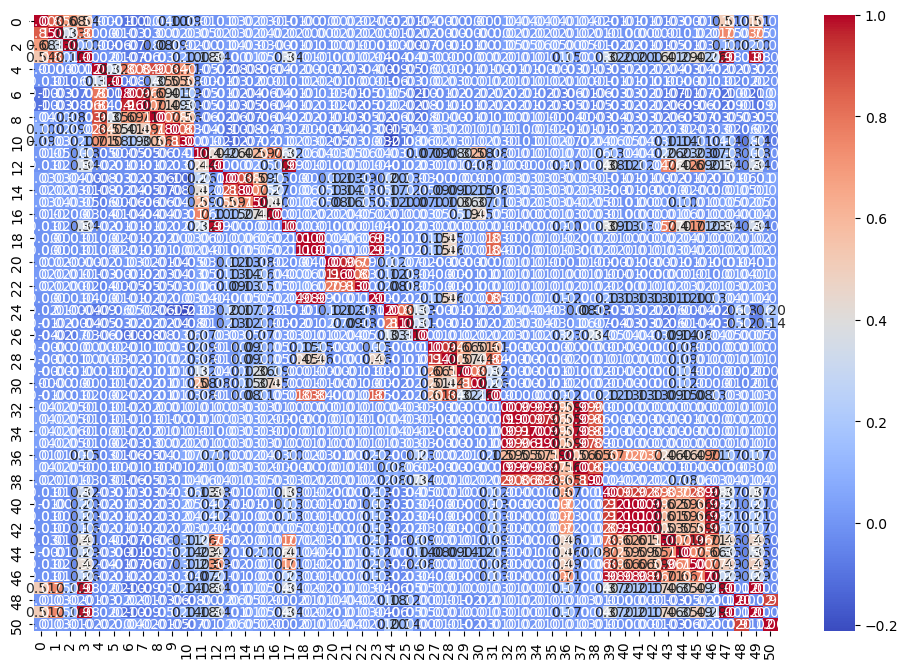

In [10]:
# Gerando o heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

<h3>3. Verificação das adequações Globais (KMO e BartLett)</h3>

In [12]:
bartlett, p_value = FuncoesUteis.teste_esfericidade(data)

Bartlett statistic: 726562.40805752
p-value : 0.0
Rejeitamos a Hipótese Nula (A Matriz de correlação de Pearson não é igual a Matrix Identidade


In [13]:
kmo_all, kmo_model = FuncoesUteis.teste_kmo(data)

print("O valor do KMO MODEL é: {}".format(kmo_model))

Adequação Global: Razoavél
O valor do KMO MODEL é: 0.6096806632455621


<div style='text-align:justify'>
<b>Comentário:</b><br><br>
Para adequação global o teste de bartlett apresentou diferenças entre as MAtriz de correlação de Pearson e a Matriz Identidade indicador que existe correlações suficientes para realização da Análise de Componentes Principais.<br>

O teste de Kaiser também apresentou uma adequação razoavel para executar a análise com KMO = 0.6

</div>

<h3>4. Definindo a PCA</h3>

In [16]:
modelo = FactorAnalyzer()

modelo.fit(data)

FactorAnalyzer(rotation_kwargs={})

<h3>5. Calculando os Autovalores</h3>

In [19]:
ev, v = modelo.get_eigenvalues()

In [20]:
serie_boolean = pd.Series(ev>1.0); serie_boolean

serie_boolean.value_counts()

False    37
True     14
Name: count, dtype: int64

<h3>5. Parametrizando a PCA para dois fatores (autovalores > 1)</h3>

In [22]:
modelo.set_params(n_factors = 2, 
                  method = 'principal', 
                  rotation = None)
modelo.fit(data)

FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

<h3>6. Eigenvalues, variâncias e variâncias acumulada</h3>

In [23]:
eigen_fatores = modelo.get_factor_variance()
eigen_fatores

(array([8.25913199, 6.05649348]),
 array([0.16194376, 0.11875477]),
 array([0.16194376, 0.28069854]))

In [24]:
tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

           Autovalor    Variância  Variância Acumulada
Fator 1 8.2591319862 0.1619437644         0.1619437644
Fator 2 6.0564934790 0.1187547741         0.2806985385


<h3>7. Calcular as cargas fatoriais (loadings)</h3>

In [25]:
cargas_fatores = modelo.loadings_

tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = data.columns
tabela_cargas

print(tabela_cargas)

         Fator 1       Fator 2
0   0.1437539712 -0.0009171274
1   0.2086246845 -0.0441182558
2   0.0336939925  0.0436795865
3   0.5293199038 -0.1395887950
4  -0.0750742416 -0.0285978903
5  -0.0022740881  0.0015154743
6  -0.1176766714 -0.0254726389
7  -0.1104974492 -0.0288438435
8  -0.0901189033 -0.0118767295
9  -0.0392460517 -0.0190720543
10  0.0876313337 -0.0374294664
11  0.2653219780 -0.0341945933
12  0.5033456092 -0.1483569950
13  0.0202962166  0.0618600216
14  0.0528247609  0.0578135000
15  0.0956836734  0.0468244878
16  0.0788248561  0.0083645513
17  0.5041458905 -0.1512573468
18  0.0963276507 -0.0140985142
19  0.1008285363 -0.0166115693
20  0.0030475765  0.0275181020
21  0.0192103291  0.0315260356
22  0.0386056524  0.0257522038
23  0.2040228931 -0.0369706603
24 -0.0288623587  0.1047551928
25 -0.0310292457  0.0907737590
26  0.1172427446  0.0944139306
27  0.0662707585 -0.0167203358
28  0.0919602667 -0.0205872938
29  0.0718014346 -0.0100085115
30  0.0811436947 -0.0106429888
31  0.20

<h3>8. Calculo das Comunalidades</h3>

In [26]:
comunalidades = modelo.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = data.columns
tabela_comunalidades

print(tabela_comunalidades)

    Comunalidades
0    0.0206660454
1    0.0454706795
2    0.0030431914
3    0.2996645922
4    0.0064539811
5    0.0000074681
6    0.0144966543
7    0.0130416536
8    0.0082624734
9    0.0019039958
10   0.0090802156
11   0.0715650222
12   0.2753666002
13   0.0042385987
14   0.0061328561
15   0.0113478980
16   0.0062833237
17   0.2770418639
18   0.0094777844
19   0.0104423380
20   0.0007665337
21   0.0013629277
22   0.0021535724
23   0.0429921706
24   0.0118066862
25   0.0092026894
26   0.0226598514
27   0.0046713831
28   0.0088805273
29   0.0052556163
30   0.0066975724
31   0.0438856777
32   0.9804895186
33   0.9474449985
34   0.9677418592
35   0.9623890667
36   0.7863691016
37   0.9713673175
38   0.8713021322
39   0.8884539889
40   0.6949780117
41   0.6941494723
42   0.6174911196
43   0.7754938370
44   0.5911721167
45   0.8333654092
46   0.7974749415
47   0.3387505135
48   0.0019567716
49   0.3387505095
50   0.0021623354


<h3>9. Resultados dos fatores para as observações do dataset (predict)</h3>

In [28]:
predict_fatores= pd.DataFrame(modelo.transform(data))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]

print(predict_fatores)

           Fator 1       Fator 2
0     0.0295444551 -0.2637822525
1     0.0384315898 -0.0640304738
2    -0.0159930782  0.5123741818
3     0.1253897343  0.2224294565
4    -0.2617365940 -0.1707783477
...            ...           ...
4995 -0.0264153422  0.0473773908
4996  0.1727343316  0.0155590625
4997 -0.0862591822 -0.0361914363
4998 -0.0235302553  0.0598225924
4999  0.1875809571  0.3925225032

[5000 rows x 2 columns]


<h3>10. Adicionando o dataset</h3>

In [29]:
data = pd.concat([data.reset_index(drop=True), 
                   predict_fatores], axis=1)

data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,Fator 1,Fator 2
0,-0.1816520233,-0.1774866387,-0.2796609776,-0.0132279129,0.2915917470,0.1557488839,-0.1881734456,-0.0910669080,0.0986150033,0.0406141116,...,0.1023757140,-0.0154556685,0.0726485974,0.0079859651,0.1819139938,-1.3735928342,0.1819155501,-1.5188411065,0.0295444551,-0.2637822525
1,0.0903821461,0.2398930580,-0.4088496534,0.2324657379,-0.0139955886,2.1456123887,-0.6447354915,-0.7910488048,-1.1857966948,1.4937687246,...,-0.1164319162,-0.0154556685,0.0478097717,-0.0178791866,0.1551928345,-1.3735928342,0.1551943955,-1.5188411065,0.0384315898,-0.0640304738
2,-0.4105055933,-0.3803253698,-0.4171844066,-0.1701325960,1.2128221586,0.1500248936,0.8526814758,0.7535321229,0.5355684466,1.4937687246,...,-0.0289088641,-0.0154556685,-0.0515455311,-0.0298169489,-0.2251624069,-1.3735928342,-0.2251607778,-1.5188411065,-0.0159930782,0.5123741818
3,0.1796653406,0.0114736529,0.1245745564,0.0654894703,-0.3977366118,-0.9282665802,-0.5584112436,-0.3201064795,-0.2985552893,-0.3399762867,...,-0.0726703901,-0.0154556685,-0.0267067054,-0.0198688137,0.1790252199,-1.3735928342,0.1790267766,-1.5188411065,0.1253897343,0.2224294565
4,-0.4391122895,-0.3920412911,-0.4401049782,-0.1756984716,2.7138182223,0.0000000000,3.1656386024,3.1393401795,2.2039261212,1.4937687246,...,-0.0726703901,-0.0154556685,-0.1260620081,-0.0337962030,-0.2357545782,-1.3735928342,-0.2357529472,-1.5188411065,-0.2617365940,-0.1707783477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.3523182023,-0.3235113635,-0.4151007183,-0.1335568422,0.2786494164,1.1697960311,-0.5584112436,-0.3793020940,0.5355684466,1.4937687246,...,0.1898987661,-0.0154556685,-0.0515455311,-0.0178791866,-0.1695535077,0.6234889253,-0.1695518885,0.6583967182,-0.0264153422,0.0473773908
4996,0.0549213865,-0.0710442087,-0.1463049251,-0.0156132882,-0.1547608579,0.2761778954,-0.6839627794,-0.3201064795,-0.2721066572,0.0406141116,...,0.0148526619,1.4156247451,-0.0018678797,-0.0138999325,0.1953949391,0.6234889253,0.1953964930,0.6583967182,0.1727343316,0.0155590625
4997,0.0430530346,-0.1491822867,0.2579306088,-0.0869095040,-0.2829151791,-0.4236393898,-0.5584112436,-0.7020056125,-0.2721066572,0.0406141116,...,-0.1601934422,-0.0154556685,-0.0763843568,-0.0337962030,-0.1387399185,0.6234889253,-0.1387383049,0.6583967182,-0.0862591822,-0.0361914363
4998,-0.4336290388,-0.3875656996,-0.4380212898,-0.1717228462,-0.0014148858,-0.7761860783,-0.1881734456,-0.3201064795,0.0986150033,0.0406141116,...,0.1898987661,-0.0154556685,0.0974874231,-0.0079310514,-0.2268475251,0.6234889253,-0.2268458957,0.6583967182,-0.0235302553,0.0598225924


<h3>11. Correlação entre os fatores</h3>

In [30]:
"""" 
# A seguir, verifica-se que a correlação entre os fatores é zero (ortogonais)
"""

'" \n# A seguir, verifica-se que a correlação entre os fatores é zero (ortogonais)\n'

In [31]:
corr_fator = pg.rcorr(data[['Fator 1','Fator 2']], 
                      method = 'pearson', 
                      upper = 'pval', 
                      decimals = 4, 
                      pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

print(corr_fator)

        Fator 1 Fator 2
Fator 1       -        
Fator 2    -0.0       -


<h3>12. Criando um ranking</h3>

In [32]:
data['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    data['Ranking'] = data['Ranking'] + data[tabela_eigen.index[index]]*variancia
    
data

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,Fator 1,Fator 2,Ranking
0,-0.1816520233,-0.1774866387,-0.2796609776,-0.0132279129,0.2915917470,0.1557488839,-0.1881734456,-0.0910669080,0.0986150033,0.0406141116,...,-0.0154556685,0.0726485974,0.0079859651,0.1819139938,-1.3735928342,0.1819155501,-1.5188411065,0.0295444551,-0.2637822525,-0.0265408615
1,0.0903821461,0.2398930580,-0.4088496534,0.2324657379,-0.0139955886,2.1456123887,-0.6447354915,-0.7910488048,-1.1857966948,1.4937687246,...,-0.0154556685,0.0478097717,-0.0178791866,0.1551928345,-1.3735928342,0.1551943955,-1.5188411065,0.0384315898,-0.0640304738,-0.0013801681
2,-0.4105055933,-0.3803253698,-0.4171844066,-0.1701325960,1.2128221586,0.1500248936,0.8526814758,0.7535321229,0.5355684466,1.4937687246,...,-0.0154556685,-0.0515455311,-0.0298169489,-0.2251624069,-1.3735928342,-0.2251607778,-1.5188411065,-0.0159930782,0.5123741818,0.0582569009
3,0.1796653406,0.0114736529,0.1245745564,0.0654894703,-0.3977366118,-0.9282665802,-0.5584112436,-0.3201064795,-0.2985552893,-0.3399762867,...,-0.0154556685,-0.0267067054,-0.0198688137,0.1790252199,-1.3735928342,0.1790267766,-1.5188411065,0.1253897343,0.2224294565,0.0467206454
4,-0.4391122895,-0.3920412911,-0.4401049782,-0.1756984716,2.7138182223,0.0000000000,3.1656386024,3.1393401795,2.2039261212,1.4937687246,...,-0.0154556685,-0.1260620081,-0.0337962030,-0.2357545782,-1.3735928342,-0.2357529472,-1.5188411065,-0.2617365940,-0.1707783477,-0.0626673534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.3523182023,-0.3235113635,-0.4151007183,-0.1335568422,0.2786494164,1.1697960311,-0.5584112436,-0.3793020940,0.5355684466,1.4937687246,...,-0.0154556685,-0.0515455311,-0.0178791866,-0.1695535077,0.6234889253,-0.1695518885,0.6583967182,-0.0264153422,0.0473773908,0.0013484914
4996,0.0549213865,-0.0710442087,-0.1463049251,-0.0156132882,-0.1547608579,0.2761778954,-0.6839627794,-0.3201064795,-0.2721066572,0.0406141116,...,1.4156247451,-0.0018678797,-0.0138999325,0.1953949391,0.6234889253,0.1953964930,0.6583967182,0.1727343316,0.0155590625,0.0298209609
4997,0.0430530346,-0.1491822867,0.2579306088,-0.0869095040,-0.2829151791,-0.4236393898,-0.5584112436,-0.7020056125,-0.2721066572,0.0406141116,...,-0.0154556685,-0.0763843568,-0.0337962030,-0.1387399185,0.6234889253,-0.1387383049,0.6583967182,-0.0862591822,-0.0361914363,-0.0182670425
4998,-0.4336290388,-0.3875656996,-0.4380212898,-0.1717228462,-0.0014148858,-0.7761860783,-0.1881734456,-0.3201064795,0.0986150033,0.0406141116,...,-0.0154556685,0.0974874231,-0.0079310514,-0.2268475251,0.6234889253,-0.2268458957,0.6583967182,-0.0235302553,0.0598225924,0.0032936403


<h3>13. Construindo Scores numa escala de 0 a 100</h3>

In [34]:
scaler_score = MinMaxScaler(feature_range=(0,100))

data['score'] = scaler_score.fit_transform(data[['Ranking']])

data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,Fator 1,Fator 2,Ranking,score
0,-0.1816520233,-0.1774866387,-0.2796609776,-0.0132279129,0.2915917470,0.1557488839,-0.1881734456,-0.0910669080,0.0986150033,0.0406141116,...,0.0726485974,0.0079859651,0.1819139938,-1.3735928342,0.1819155501,-1.5188411065,0.0295444551,-0.2637822525,-0.0265408615,0.6057901437
1,0.0903821461,0.2398930580,-0.4088496534,0.2324657379,-0.0139955886,2.1456123887,-0.6447354915,-0.7910488048,-1.1857966948,1.4937687246,...,0.0478097717,-0.0178791866,0.1551928345,-1.3735928342,0.1551943955,-1.5188411065,0.0384315898,-0.0640304738,-0.0013801681,0.8529024972
2,-0.4105055933,-0.3803253698,-0.4171844066,-0.1701325960,1.2128221586,0.1500248936,0.8526814758,0.7535321229,0.5355684466,1.4937687246,...,-0.0515455311,-0.0298169489,-0.2251624069,-1.3735928342,-0.2251607778,-1.5188411065,-0.0159930782,0.5123741818,0.0582569009,1.4386199198
3,0.1796653406,0.0114736529,0.1245745564,0.0654894703,-0.3977366118,-0.9282665802,-0.5584112436,-0.3201064795,-0.2985552893,-0.3399762867,...,-0.0267067054,-0.0198688137,0.1790252199,-1.3735928342,0.1790267766,-1.5188411065,0.1253897343,0.2224294565,0.0467206454,1.3253181440
4,-0.4391122895,-0.3920412911,-0.4401049782,-0.1756984716,2.7138182223,0.0000000000,3.1656386024,3.1393401795,2.2039261212,1.4937687246,...,-0.1260620081,-0.0337962030,-0.2357545782,-1.3735928342,-0.2357529472,-1.5188411065,-0.2617365940,-0.1707783477,-0.0626673534,0.2509786807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.3523182023,-0.3235113635,-0.4151007183,-0.1335568422,0.2786494164,1.1697960311,-0.5584112436,-0.3793020940,0.5355684466,1.4937687246,...,-0.0515455311,-0.0178791866,-0.1695535077,0.6234889253,-0.1695518885,0.6583967182,-0.0264153422,0.0473773908,0.0013484914,0.8797016581
4996,0.0549213865,-0.0710442087,-0.1463049251,-0.0156132882,-0.1547608579,0.2761778954,-0.6839627794,-0.3201064795,-0.2721066572,0.0406141116,...,-0.0018678797,-0.0138999325,0.1953949391,0.6234889253,0.1953964930,0.6583967182,0.1727343316,0.0155590625,0.0298209609,1.1593401734
4997,0.0430530346,-0.1491822867,0.2579306088,-0.0869095040,-0.2829151791,-0.4236393898,-0.5584112436,-0.7020056125,-0.2721066572,0.0406141116,...,-0.0763843568,-0.0337962030,-0.1387399185,0.6234889253,-0.1387383049,0.6583967182,-0.0862591822,-0.0361914363,-0.0182670425,0.6870503401
4998,-0.4336290388,-0.3875656996,-0.4380212898,-0.1717228462,-0.0014148858,-0.7761860783,-0.1881734456,-0.3201064795,0.0986150033,0.0406141116,...,0.0974874231,-0.0079310514,-0.2268475251,0.6234889253,-0.2268458957,0.6583967182,-0.0235302553,0.0598225924,0.0032936403,0.8988056758


<h3>14. Visualizando os Dados com Scores</h3>

In [39]:
data_id = pd.read_csv('storage/trusted/data_final.csv', sep=',')

data_id

,Id_cliente,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,...,leads_finalidade_residencial,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_max_ate_hj,tempo_min_ate_hj,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj
0,1,72.0400000000,157.9100000000,79.0000000000,615.0000000000,13893.1700000000,10104.5600000000,4612.0000000000,6446.0000000000,13209.0000000000,...,20.0000000000,9.0000000000,6.0000000000,1.0000000000,9.0000000000,24.0000000000,1754,17,1754.0000000000,17.0000000000
1,2,147.4500000000,462.8600000000,17.0000000000,1542.0000000000,11569.3300000000,17968.0800000000,841.0000000000,841.0000000000,1554.0000000000,...,6.0000000000,4.0000000000,1.0000000000,1.0000000000,8.0000000000,11.0000000000,1643,17,1643.0000000000,17.0000000000
2,3,8.6000000000,9.7100000000,13.0000000000,23.0000000000,20898.6700000000,10081.9400000000,13209.0000000000,13209.0000000000,17174.0000000000,...,0.0000000000,1.0000000000,3.0000000000,1.0000000000,4.0000000000,5.0000000000,63,17,63.0000000000,17.0000000000
3,4,172.2000000000,295.9700000000,273.0000000000,912.0000000000,8651.1700000000,5820.7600000000,1554.0000000000,4612.0000000000,9605.0000000000,...,8.0000000000,3.0000000000,2.0000000000,1.0000000000,5.0000000000,10.0000000000,1742,17,1742.0000000000,17.0000000000
4,5,0.6700000000,1.1500000000,2.0000000000,2.0000000000,32313.0000000000,9489.0733293839,32313.0000000000,32313.0000000000,32313.0000000000,...,3.0000000000,1.0000000000,2.0000000000,1.0000000000,1.0000000000,3.0000000000,19,17,19.0000000000,17.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,24.7300000000,51.2200000000,14.0000000000,161.0000000000,13794.7500000000,14111.8600000000,1554.0000000000,4138.0000000000,17174.0000000000,...,10.0000000000,0.0000000000,8.0000000000,1.0000000000,4.0000000000,11.0000000000,294,18,294.0000000000,18.0000000000
4996,4997,137.6200000000,235.6800000000,143.0000000000,606.0000000000,10498.8800000000,10580.4700000000,517.0000000000,4612.0000000000,9845.0000000000,...,8.0000000000,2.0000000000,4.0000000000,2.0000000000,6.0000000000,13.0000000000,1810,18,1810.0000000000,18.0000000000
4997,4998,134.3300000000,178.5900000000,337.0000000000,337.0000000000,9524.3300000000,7814.9400000000,1554.0000000000,1554.0000000000,9845.0000000000,...,2.0000000000,0.0000000000,0.0000000000,1.0000000000,3.0000000000,3.0000000000,422,18,422.0000000000,18.0000000000
4998,4999,2.1900000000,4.4200000000,3.0000000000,17.0000000000,11665.0000000000,6421.7500000000,4612.0000000000,4612.0000000000,13209.0000000000,...,16.0000000000,5.0000000000,8.0000000000,1.0000000000,10.0000000000,16.0000000000,56,18,56.0000000000,18.0000000000


In [41]:
resultado_final = pd.concat([data_id['Id_cliente'], data], axis=1)

resultado_final[['Id_cliente','score']]

,Id_cliente,score
0,1,0.6057901437
1,2,0.8529024972
2,3,1.4386199198
3,4,1.3253181440
4,5,0.2509786807
...,...,...
4995,4996,0.8797016581
4996,4997,1.1593401734
4997,4998,0.6870503401
4998,4999,0.8988056758


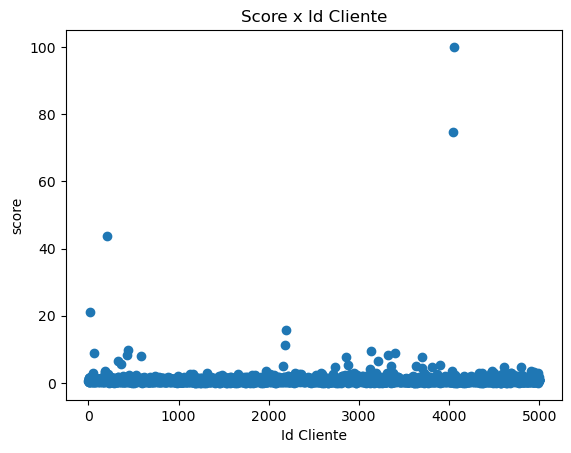

In [45]:
plt.scatter(resultado_final['Id_cliente'], resultado_final['score'])
plt.title('Score x Id Cliente')
plt.xlabel('Id Cliente')
plt.ylabel('score')
plt.show()

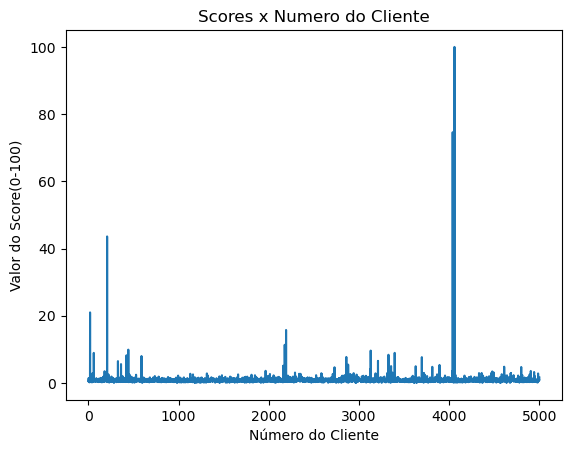

In [42]:
plt.plot(resultado_final['score'])
plt.title('Scores x Numero do Cliente')
plt.xlabel('Número do Cliente')
plt.ylabel('Valor do Score(0-100)')
plt.show()